<a href="https://colab.research.google.com/github/tusharsuthar4828/DataScience_ExcelR/blob/main/SimpleLinear_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api

In [4]:
# import dataset
dataset=pd.read_csv('/content/Salary_Data.csv')
x = dataset['YearsExperience']
y = dataset['Salary']

In [ ]:
#EDA and Data Visualization


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


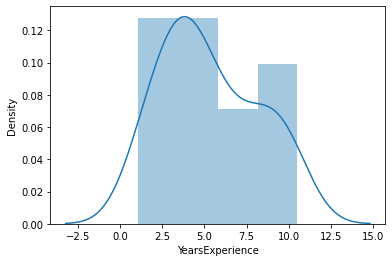

In [ ]:
sns.distplot(dataset['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


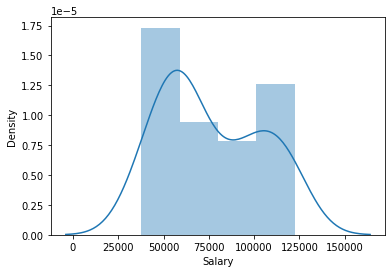

In [15]:
sns.distplot(dataset['Salary'])

In [6]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [7]:
N = len(x)
x_mean = x.mean()
y_mean = y.mean()

In [8]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

In [9]:
B0 = y_mean - (B1 * x_mean)

In [10]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [11]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 25792.20019866869 + 9449.962β
Correlation Coef.:  0.97824161848876
"Goodness of Fit":  0.9569566641435087


In [ ]:
#Plotting the Regression Line

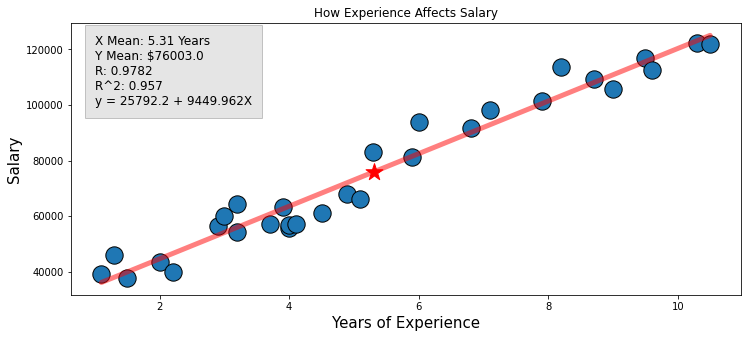

In [22]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=100000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Experience Affects Salary')
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point